<a href="https://colab.research.google.com/github/seonghaiiiii/busan-car-accident/blob/main/eclo_group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/대구교통사고/data/train.csv')

In [ ]:
train_df = train[['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','법규위반','사망자수','중상자수','경상자수','부상자수','ECLO']]

#train, test 분리

In [ ]:
# '사고일시' 열을 datetime 타입으로 변환
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])

# '년도', '월', '일', '시간' 열 추가
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour

<ipython-input-5-43ce9faddc7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
<ipython-input-5-43ce9faddc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['사고일시'].dt.year
<ipython-input-5-43ce9faddc7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
# '사고일시' 열 삭제
train_df = train_df.drop('사고일시', axis=1)

In [ ]:
train_df = train_df.drop('day', axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      39609 non-null  object
 1   기상상태    39609 non-null  object
 2   시군구     39609 non-null  object
 3   도로형태    39609 non-null  object
 4   노면상태    39609 non-null  object
 5   사고유형    39609 non-null  object
 6   법규위반    39609 non-null  object
 7   사망자수    39609 non-null  int64 
 8   중상자수    39609 non-null  int64 
 9   경상자수    39609 non-null  int64 
 10  부상자수    39609 non-null  int64 
 11  ECLO    39609 non-null  int64 
 12  year    39609 non-null  int64 
 13  month   39609 non-null  int64 
 14  hour    39609 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.5+ MB


In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df[(train_df['year'] >= 2019) & (train_df['year'] <= 2021) & (train_df['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df[(train_df['year'] == 2021) & (train_df['month'] >= 10)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29104 entries, 0 to 36472
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      29104 non-null  object
 1   기상상태    29104 non-null  object
 2   시군구     29104 non-null  object
 3   도로형태    29104 non-null  object
 4   노면상태    29104 non-null  object
 5   사고유형    29104 non-null  object
 6   법규위반    29104 non-null  object
 7   사망자수    29104 non-null  int64 
 8   중상자수    29104 non-null  int64 
 9   경상자수    29104 non-null  int64 
 10  부상자수    29104 non-null  int64 
 11  ECLO    29104 non-null  int64 
 12  year    29104 non-null  int64 
 13  month   29104 non-null  int64 
 14  hour    29104 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 3.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 36473 to 39608
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      3136 non-null   object
 1   기상상태    3136 non-null   object
 2   시군구     3136 non-null   object
 3   도로형태    3136 non-null   object
 4   노면상태    3136 non-null   object
 5   사고유형    3136 non-null   object
 6   법규위반    3136 non-null   object
 7   사망자수    3136 non-null   int64 
 8   중상자수    3136 non-null   int64 
 9   경상자수    3136 non-null   int64 
 10  부상자수    3136 non-null   int64 
 11  ECLO    3136 non-null   int64 
 12  year    3136 non-null   int64 
 13  month   3136 non-null   int64 
 14  hour    3136 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 392.0+ KB


# 결측치 및 이상치 확인

In [ ]:
train.isnull().sum()

요일       0
기상상태     0
시군구      0
도로형태     0
노면상태     0
사고유형     0
법규위반     0
사망자수     0
중상자수     0
경상자수     0
부상자수     0
ECLO     0
year     0
month    0
hour     0
dtype: int64

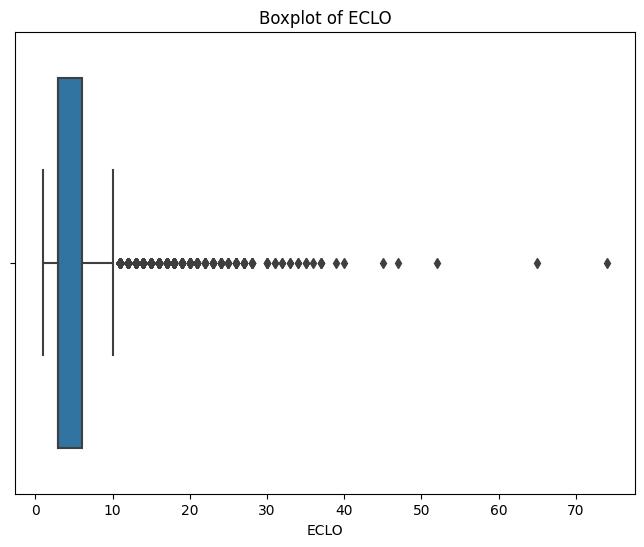

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ECLO 열에 대한 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['ECLO'])
plt.title('Boxplot of ECLO')
plt.show()

In [ ]:
# ECLO가 40 이상인 행 선택
eclo_over_40 = train[train['ECLO'] > 40]

# 선택된 행 출력
eclo_over_40

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour
5358,목요일,맑음,대구광역시 달서구 송현동,교차로 - 교차로부근,건조,차대차,차로위반,0,1,14,0,47,2019,5,19
10155,일요일,맑음,대구광역시 동구 신평동,단일로 - 기타,젖음/습기,차량단독,과속,1,2,15,0,65,2019,9,15
29350,화요일,맑음,대구광역시 북구 침산동,교차로 - 교차로부근,건조,차대차,안전거리미확보,0,0,15,0,45,2021,3,18
30002,월요일,맑음,대구광역시 서구 상리동,단일로 - 기타,건조,차대차,안전운전불이행,1,4,7,1,52,2021,3,15
32591,금요일,맑음,대구광역시 서구 비산동,단일로 - 기타,건조,차대차,안전운전불이행,0,4,18,0,74,2021,6,14


In [ ]:
# ECLO가 40 초과인 행 제거
train = train[train['ECLO'] <= 40]

#ECLO 그룹화


In [ ]:
train_df['ECLO'].describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.2 MB/s eta 0:00:00


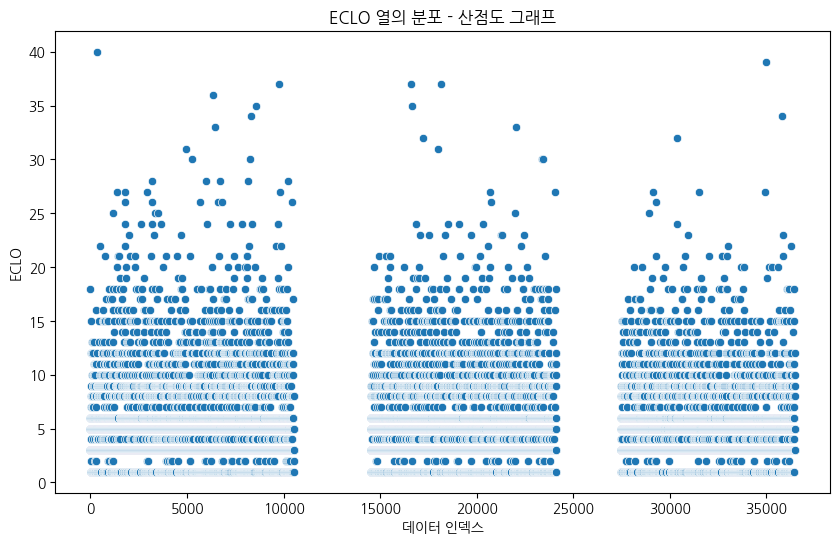

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train.index, y=train['ECLO'])
plt.title('ECLO 열의 분포 - 산점도 그래프')
plt.xlabel('데이터 인덱스')
plt.ylabel('ECLO')
plt.show()


In [ ]:
def eclo_group(a):
    if a<=2:
        return 'very safe'
    elif a<=4:
        return 'safe'
    elif a<=9:
        return 'normal'
    else:
        return 'dangerous'

train['ECLO_group'] = train['ECLO'].apply(eclo_group)
train['ECLO_group'].value_counts()

safe         14302
normal       10732
dangerous     2054
very safe     2011
Name: ECLO_group, dtype: int64

In [ ]:
test['ECLO_group'] = test['ECLO'].apply(eclo_group)
test['ECLO_group'].value_counts()

<ipython-input-26-300d1b1284c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ECLO_group'] = test['ECLO'].apply(eclo_group)


safe         1626
normal       1139
very safe     187
dangerous     184
Name: ECLO_group, dtype: int64

#train 시각화

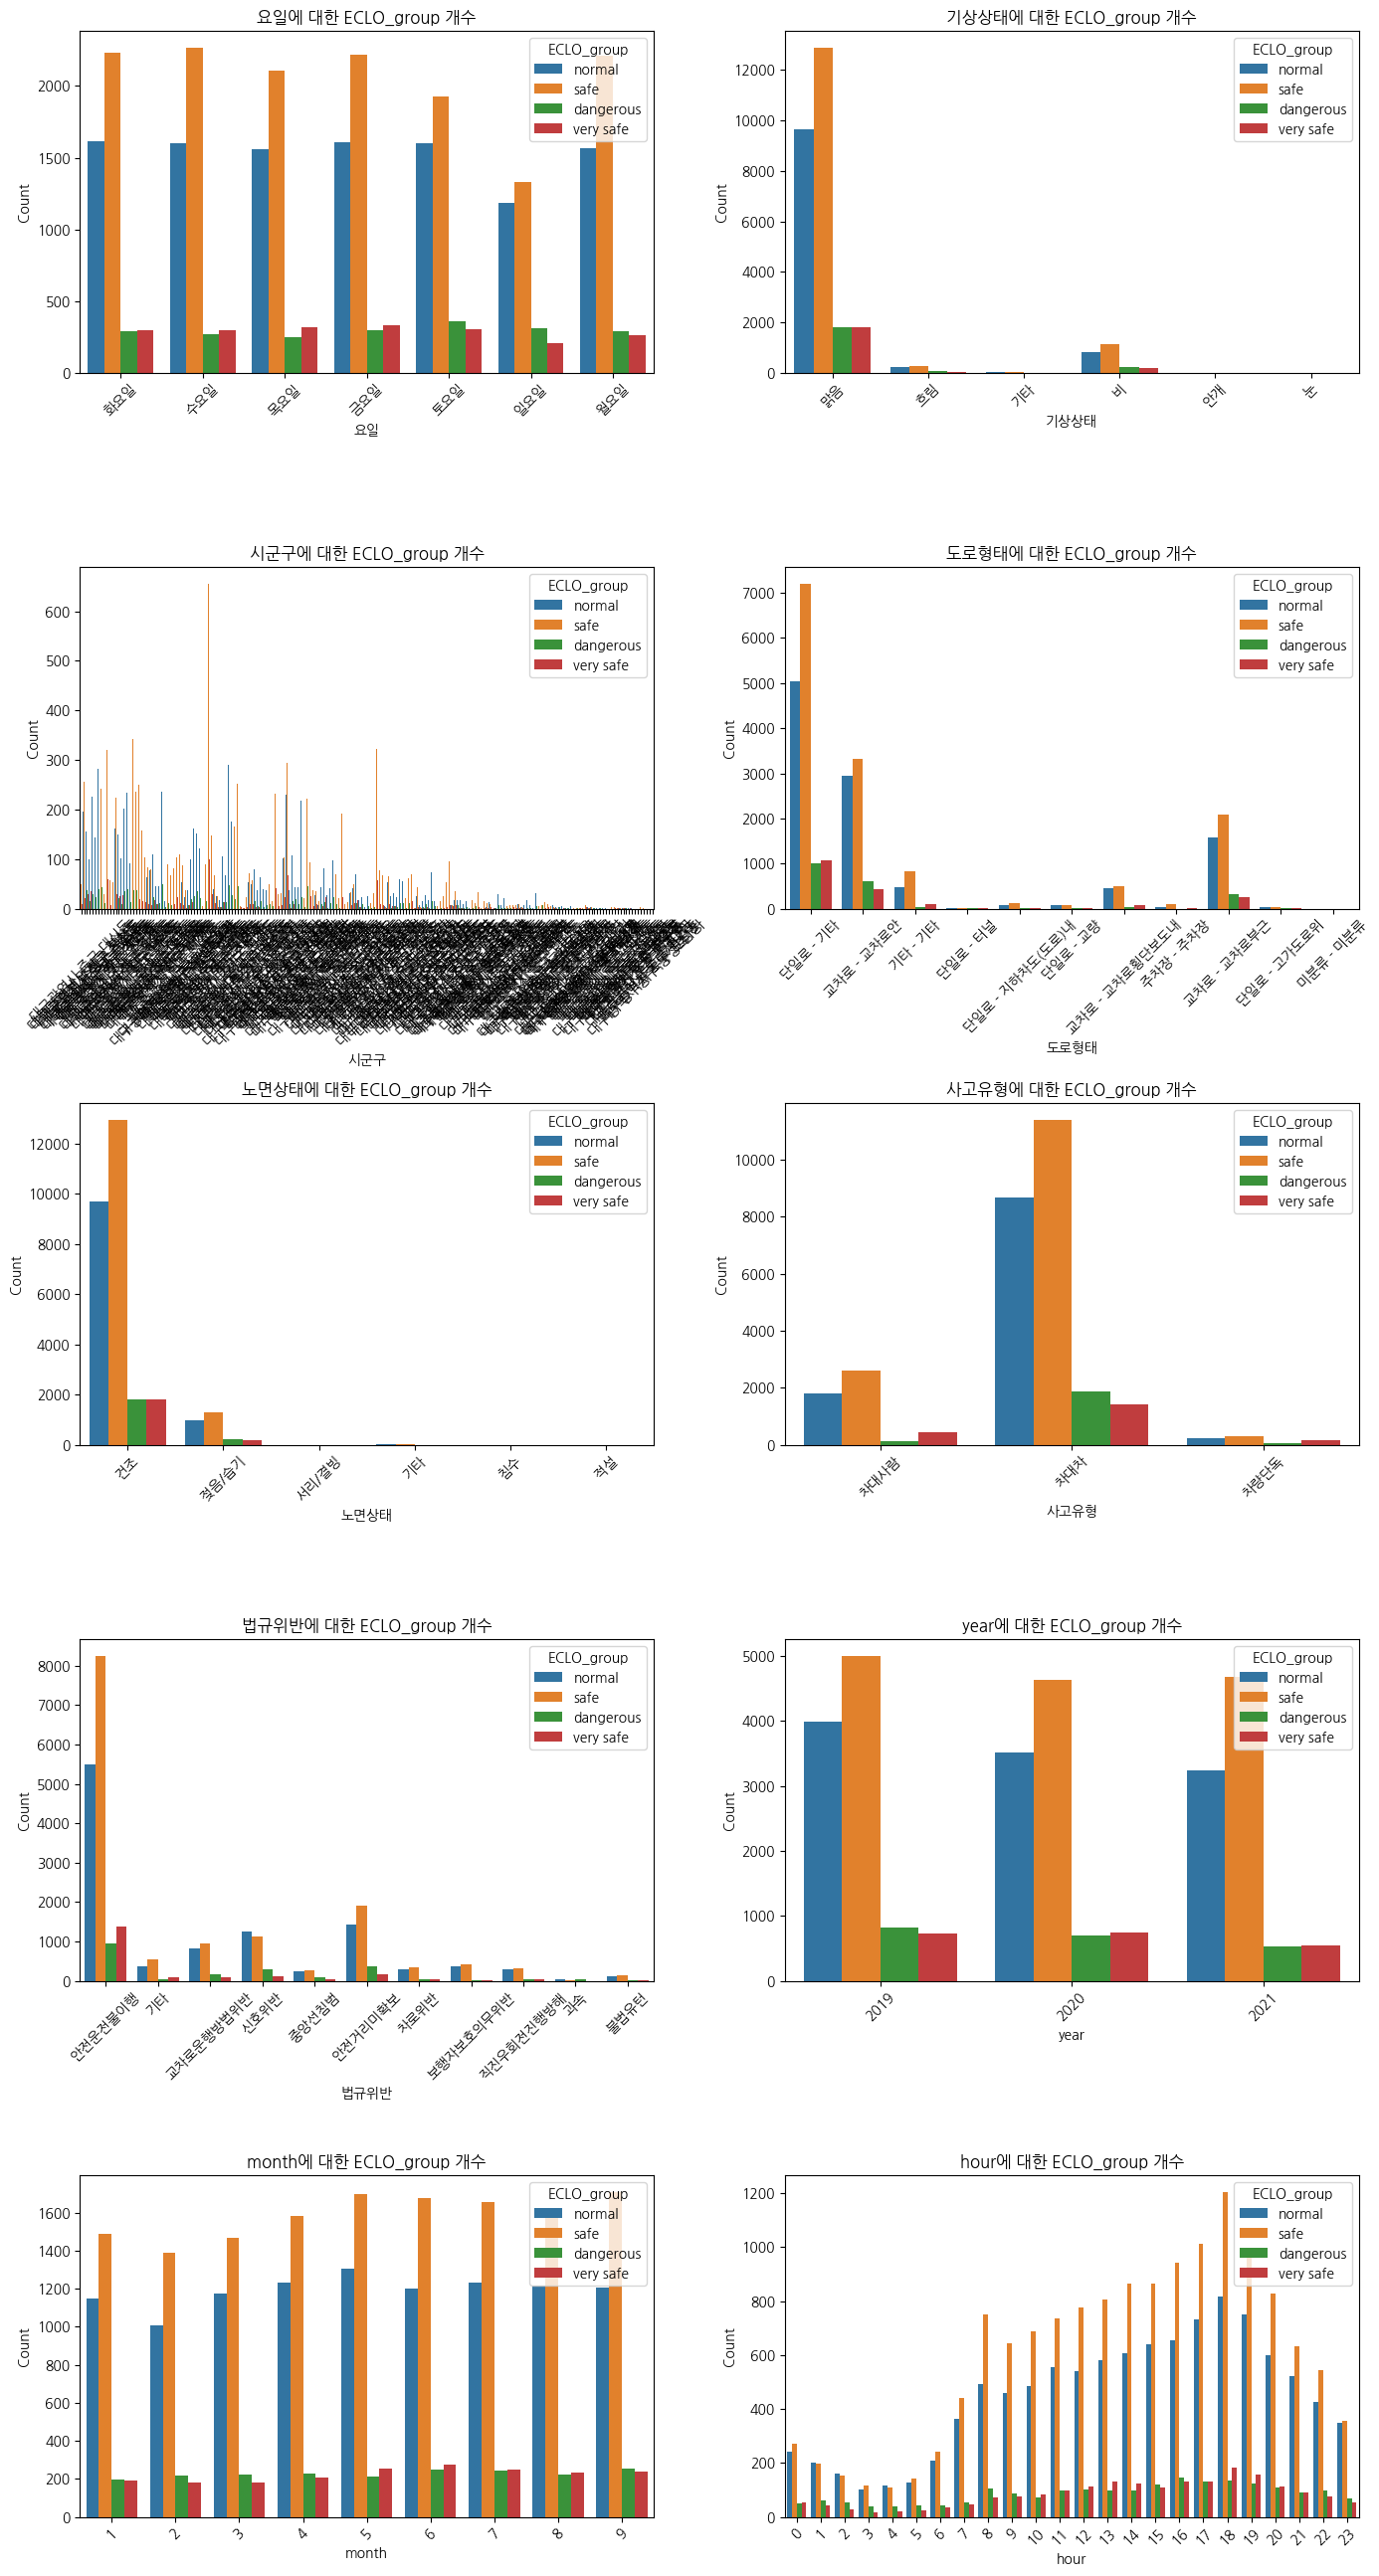

In [ ]:
# 그래프의 행과 열 개수
rows, cols = 5, 2

# 그래프 크기 설정
plt.figure(figsize=(14, 26))

# 열 이름 리스트
columns = ['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '법규위반', 'year', 'month', 'hour']

# 서브플롯 인덱스 초기화
i = 1

# 각 열에 대해 그래프 그리기
for col in columns:
    plt.subplot(rows, cols, i)
    sns.countplot(x=train[col], hue=train['ECLO_group'])
    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 ECLO_group 개수')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='ECLO_group', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


#Random Forest

In [ ]:
def eclo_group(a):
    if a<=2:
        return 'very safe'
    elif a<=4:
        return 'safe'
    elif a<=9:
        return 'normal'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe         19493
normal       14653
dangerous     2735
very safe     2728
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          39609 non-null  object
 1   기상상태        39609 non-null  object
 2   시군구         39609 non-null  object
 3   도로형태        39609 non-null  object
 4   노면상태        39609 non-null  object
 5   사고유형        39609 non-null  object
 6   year        39609 non-null  int64 
 7   month       39609 non-null  int64 
 8   hour        39609 non-null  int64 
 9   ECLO_group  39609 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.0+ MB


In [ ]:
#One - Hot Encoding
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,도로형태_주차장 - 주차장,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
0,2019,1,0,normal,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2019,1,0,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2019,1,1,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2019,1,2,normal,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2019,1,4,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36468,2021,9,20,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36469,2021,9,21,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36470,2021,9,21,dangerous,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36471,2021,9,22,normal,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,도로형태_주차장 - 주차장,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
36473,2021,10,5,normal,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36474,2021,10,6,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36475,2021,10,6,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36476,2021,10,7,dangerous,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36477,2021,10,7,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021,12,19,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39605,2021,12,19,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39606,2021,12,21,dangerous,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39607,2021,12,22,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
train_x = train.drop(['ECLO_group'],axis = 1)
train_y = train['ECLO_group']
test_x = test.drop(['ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# RandomForestClassifier 모델 정의
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.426179077411993
macro F1 Score: 0.2417504172520776
Accuracy: 0.475765306122449
Macro Precision: 0.2950973045393646
              precision    recall  f1-score   support

   dangerous       0.10      0.02      0.03       184
      normal       0.36      0.24      0.29      1139
        safe       0.52      0.75      0.61      1626
   very safe       0.20      0.02      0.04       187

    accuracy                           0.48      3136
   macro avg       0.30      0.26      0.24      3136
weighted avg       0.42      0.48      0.43      3136



#Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBClassifier 모델 정의
model = XGBClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train_encoded)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# F1 스코어 계산
f1_1 = f1_score(test_y_encoded, predictions, average='weighted')
f1_2 = f1_score(test_y_encoded, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y_encoded, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y_encoded, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y_encoded, predictions))

Weighted F1 Score: 0.4031571277367035
macro F1 Score: 0.20835207942675082
Accuracy: 0.5089285714285714
Macro Precision: 0.25444700349331295
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.37      0.10      0.16      1139
           2       0.53      0.91      0.67      1626
           3       0.12      0.01      0.01       187

    accuracy                           0.51      3136
   macro avg       0.25      0.25      0.21      3136
weighted avg       0.41      0.51      0.40      3136



#LightGBM

In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 23283, number of used features: 166
[LightGBM] [Info] Start training from score -2.643318
[LightGBM] [Info] Start training from score -1.000039
[LightGBM] [Info] Start training from score -0.707727
[LightGBM] [Info] Start training from score -2.684619


In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.4031833636288008
macro F1 Score: 0.2086183143508811
Accuracy: 0.5098852040816326
Macro Precision: 0.3101109828895442


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   dangerous       0.00      0.00      0.00       184
      normal       0.38      0.10      0.16      1139
        safe       0.52      0.91      0.67      1626
   very safe       0.33      0.01      0.01       187

    accuracy                           0.51      3136
   macro avg       0.31      0.25      0.21      3136
weighted avg       0.43      0.51      0.40      3136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
